In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation

In [4]:
data = pd.read_excel(r"C:\Users\reddy\Downloads\data assingnment files\Assingnment files\Completed\Decision Tree\heart_disease.xlsx",sheet_name='Heart_disease')

In [5]:
data1 = data.drop(columns='num')
data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect


# Exploratory Data Analysis (EDA)

In [7]:
data1.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
dtype: int64

In [8]:
# observed above output oldpeak only column have null values

## Visuvalization 

<Axes: ylabel='Count'>

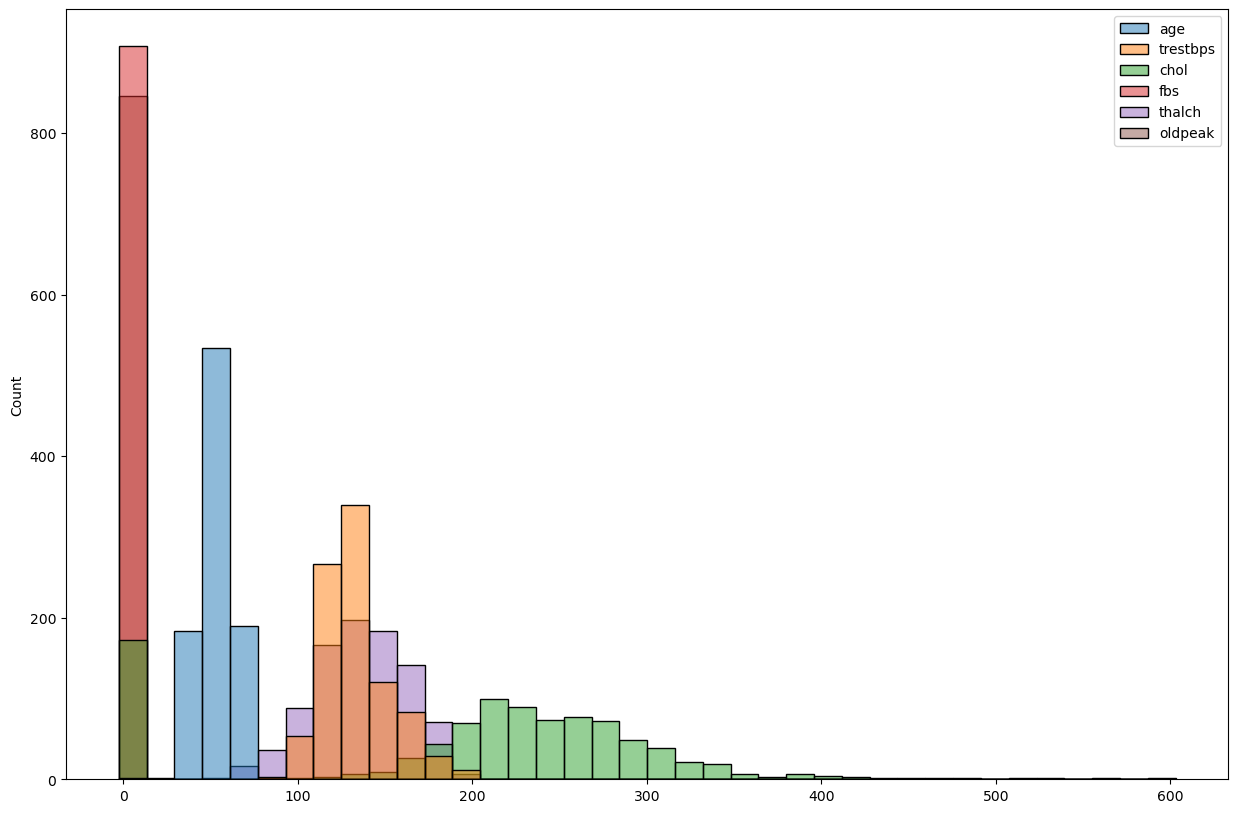

In [10]:
# Histogram graph 
plt.figure(figsize=(15,10))
sns.histplot(data1)

<Axes: >

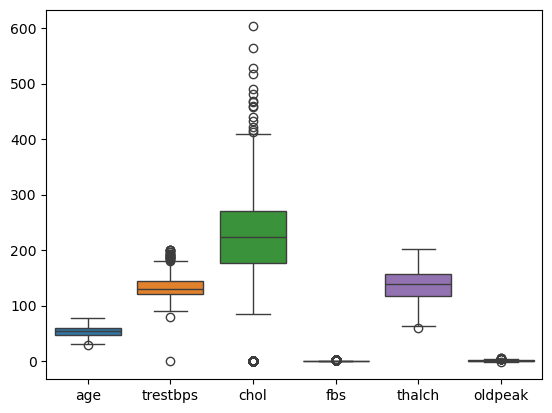

In [11]:
sns.boxplot(data1)

In [12]:
# while abserving of above output the outliers are available 

### Removing of missing values

In [14]:
mean = data1['oldpeak'].mean()

In [15]:
data1.fillna({'oldpeak':mean},inplace=True)

## Saperation of numerical and categrical columns

In [17]:
Num_col = [i for i in data1.columns if data1[i].dtype !='O']
Cat_col = [i for i in data1.columns if data1[i].dtype =='O']

### Remove of outliers

In [19]:
Num_col1 = data1[Num_col].astype(int)
Q1 = Num_col1.quantile(0.25)
Q3 = Num_col1.quantile(0.75)
IQR = Q3-Q1
print(Q1,Q3,IQR)

age          47.75
trestbps    120.00
chol        176.75
fbs           0.00
thalch      118.00
oldpeak       0.00
Name: 0.25, dtype: float64 age          60.0
trestbps    144.0
chol        270.0
fbs           0.0
thalch      156.0
oldpeak       1.0
Name: 0.75, dtype: float64 age         12.25
trestbps    24.00
chol        93.25
fbs          0.00
thalch      38.00
oldpeak      1.00
dtype: float64


In [20]:
Lower_Extreme = Q1-1.5*IQR
Upper_Extreme = Q3+1.5*IQR
print(Lower_Extreme,Upper_Extreme)

age         29.375
trestbps    84.000
chol        36.875
fbs          0.000
thalch      61.000
oldpeak     -1.500
dtype: float64 age          78.375
trestbps    180.000
chol        409.875
fbs           0.000
thalch      213.000
oldpeak       2.500
dtype: float64


In [21]:
df = data1[(Num_col1>=Lower_Extreme) & (Num_col1<=Upper_Extreme)]
# Dropping specific columns from the DataFrame
df = df.drop(columns=['cp', 'sex', 'thal', 'slope','exang','restecg'])
# convertion of Nan in the fbs column into Ture
df.fillna({'fbs':'True','chol':0,'oldpeak':mean,'trestbps':0},inplace=True)
df

,age,trestbps,chol,fbs,thalch,oldpeak
0,63.0,145.0,233.0,True,150.0,2.300000
1,41.0,135.0,203.0,False,132.0,0.000000
2,57.0,140.0,192.0,False,148.0,0.400000
3,52.0,118.0,186.0,False,190.0,0.000000
4,57.0,110.0,201.0,False,126.0,1.500000
...,...,...,...,...,...,...
903,53.0,125.0,0.0,False,120.0,1.500000
904,62.0,166.0,170.0,False,120.0,0.891253
905,56.0,170.0,0.0,False,123.0,2.500000
906,56.0,144.0,208.0,True,105.0,0.891253


In [22]:
dfs = df.drop(columns='fbs')

In [23]:
##finding correlation of num_variables
corr=dfs.corr()
corr

,age,trestbps,chol,thalch,oldpeak
age,1.000000,0.084523,-0.068098,-0.325555,0.234997
trestbps,0.084523,1.000000,0.100808,-0.007702,0.052417
chol,-0.068098,0.100808,1.000000,0.198581,0.011013
thalch,-0.325555,-0.007702,0.198581,1.000000,-0.177831
oldpeak,0.234997,0.052417,0.011013,-0.177831,1.000000


<Axes: >

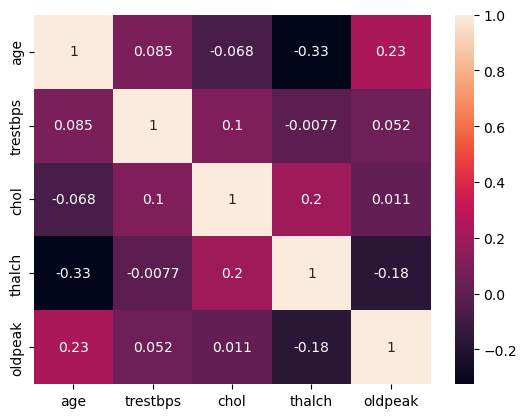

In [24]:
##visualizing using heatmap
sns.heatmap(corr,annot=True)

unique values are--- [0 1 2 3 4]


<Axes: xlabel='num', ylabel='count'>

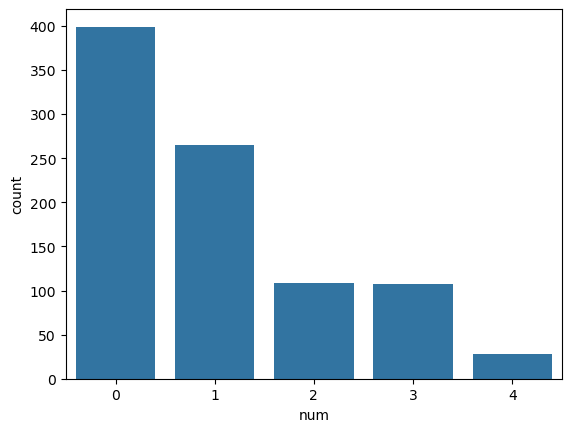

In [25]:
##we can check our target variable
print('unique values are---',data['num'].unique())
sns.countplot(data=df,x=data['num'])

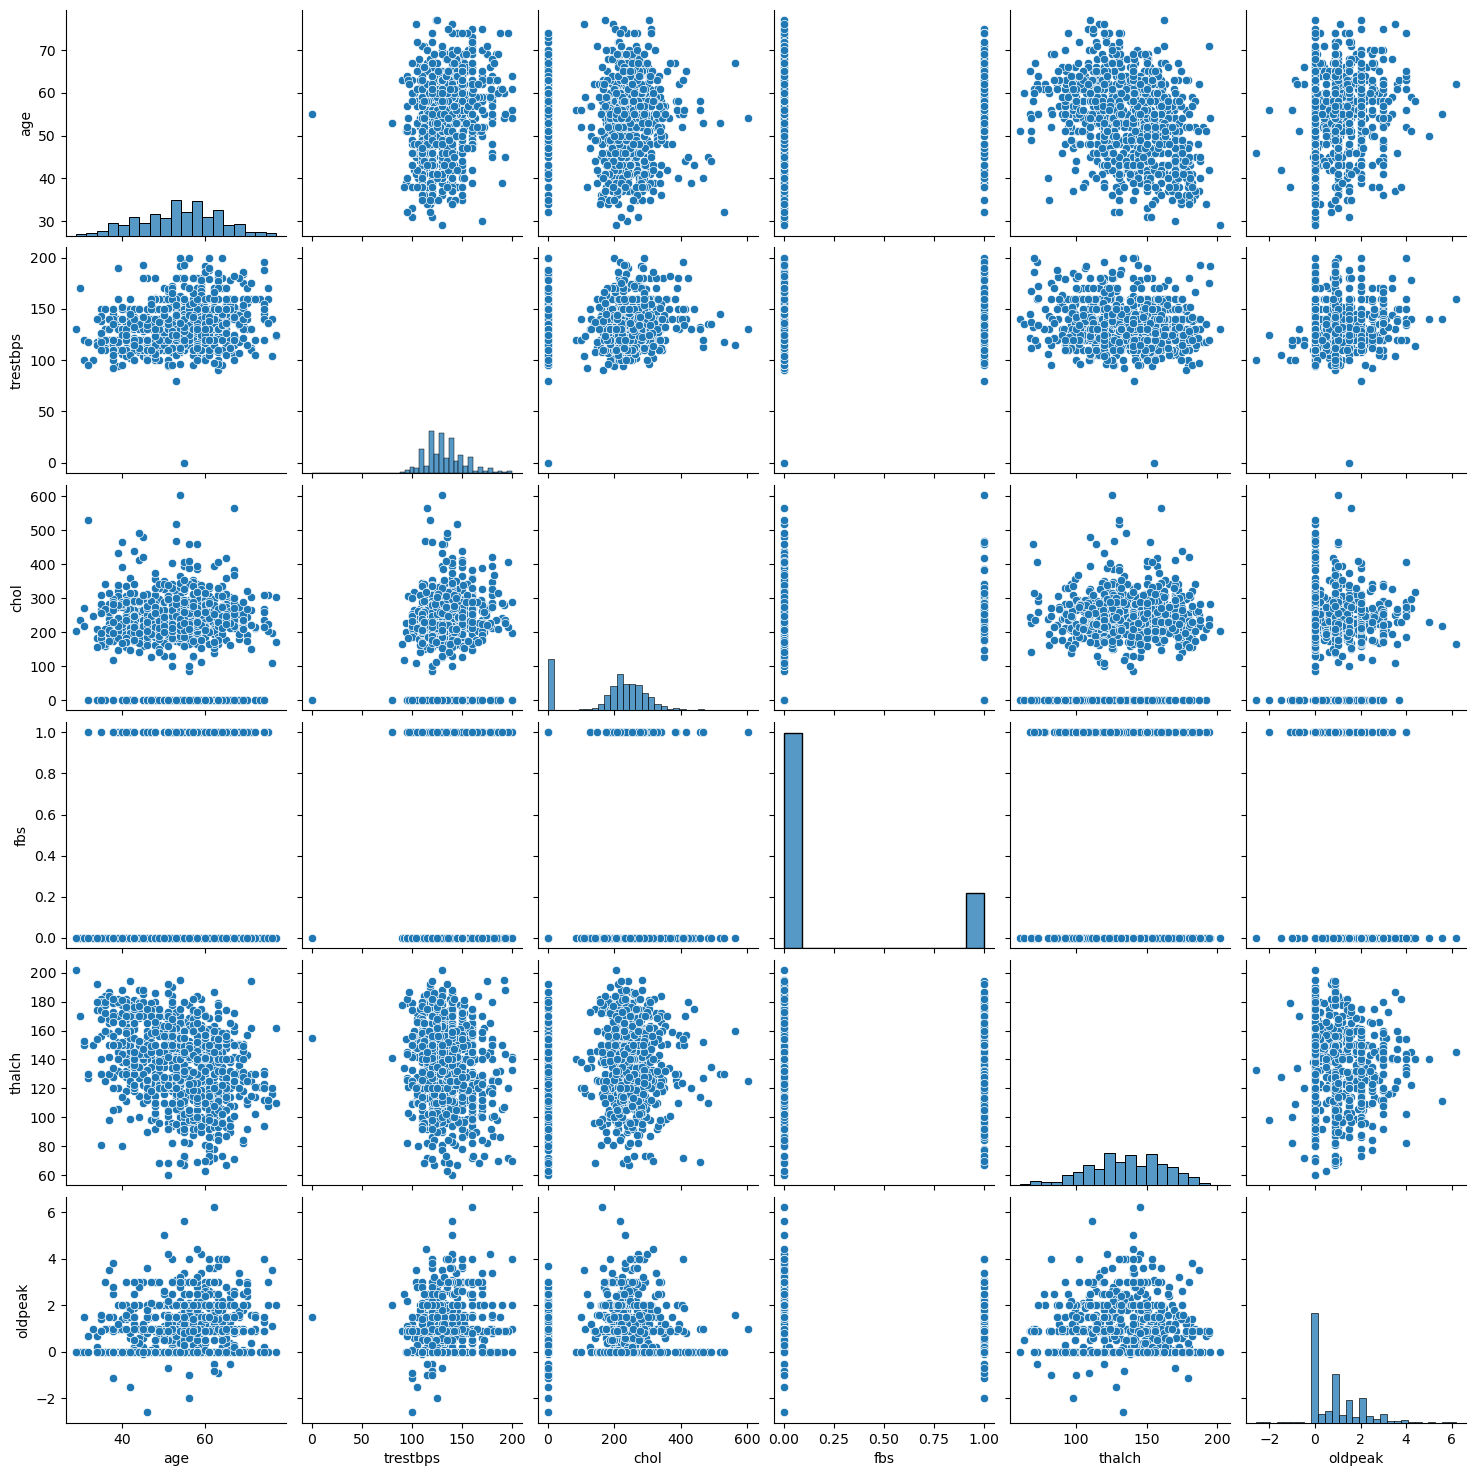

In [26]:
##multivariate analysis with pair plot
sns.pairplot(data=data1)

# Feature Engineering

## To perfrom encoding for categrical and numerical columns

In [29]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder

In [30]:
# To applying the StandardScaler
dfs = df.drop(columns='fbs')
Sta = StandardScaler()

In [31]:
df1 = pd.DataFrame(Sta.fit_transform(dfs))
df1 

,0,1,2,3,4
0,1.006567,0.586504,0.361821,0.523093,1.965241
1,-1.405471,0.216860,0.086314,-0.151421,-0.931065
2,0.348739,0.401682,-0.014706,0.448147,-0.427360
3,-0.199452,-0.411534,-0.069807,2.022013,-0.931065
4,0.348739,-0.707249,0.067946,-0.376259,0.957830
...,...,...,...,...,...
903,-0.089814,-0.152783,-1.777953,-0.601097,0.957830
904,0.896929,1.362756,-0.216745,-0.601097,0.191257
905,0.239101,1.510614,-1.777953,-0.488678,2.217094
906,0.239101,0.549540,0.132231,-1.163192,0.191257


In [32]:
# To convertion of the categrical data
dp = data1[Cat_col].drop(columns='exang')
ord = OrdinalEncoder()

In [33]:
df2 = pd.DataFrame(ord.fit_transform(dp))
dp.columns

Index(['sex', 'cp', 'restecg', 'slope', 'thal'], dtype='object')

In [34]:
# Convertion of nominal data into dummy variables
dummies = pd.get_dummies(data1['exang'],prefix='exang',dtype=int)

In [35]:
# combine of categrical and numerical columns
df4 = pd.concat([df1,df2,dummies],axis=1,ignore_index=True)

In [36]:
old_name = range(0,5)
new_name = dfs.columns
old_name1 = range(5,10)
new_name1 = dp.columns
old_name2 = range(10,15)
new_name2 = dummies.columns
df5 = df4.rename(columns=dict(zip(old_name,new_name)))
df6 = df5.rename(columns=dict(zip(old_name1,new_name1)))

In [37]:
df6 = df5.rename(columns=dict(zip(old_name1,new_name1)))

##  To saperation of target and features

In [39]:
features = df6.rename(columns=dict(zip(old_name2,new_name2)))
features 

,age,trestbps,chol,thalch,oldpeak,sex,cp,restecg,slope,thal,exang_False,exang_True,exang_FALSE,exang_TURE
0,1.006567,0.586504,0.361821,0.523093,1.965241,1.0,3.0,0.0,0.0,0.0,1,0,0,0
1,-1.405471,0.216860,0.086314,-0.151421,-0.931065,1.0,1.0,1.0,1.0,0.0,1,0,0,0
2,0.348739,0.401682,-0.014706,0.448147,-0.427360,1.0,0.0,1.0,1.0,0.0,1,0,0,0
3,-0.199452,-0.411534,-0.069807,2.022013,-0.931065,1.0,3.0,0.0,1.0,0.0,1,0,0,0
4,0.348739,-0.707249,0.067946,-0.376259,0.957830,1.0,0.0,1.0,1.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.089814,-0.152783,-1.777953,-0.601097,0.957830,1.0,0.0,1.0,2.0,2.0,1,0,0,0
904,0.896929,1.362756,-0.216745,-0.601097,0.191257,1.0,0.0,2.0,1.0,2.0,0,1,0,0
905,0.239101,1.510614,-1.777953,-0.488678,2.217094,1.0,2.0,0.0,0.0,1.0,0,1,0,0
906,0.239101,0.549540,0.132231,-1.163192,0.191257,1.0,2.0,2.0,0.0,0.0,0,0,0,1


In [40]:
target = data[['num']]
target

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


# Decision Tree Classification

## Split the dataset into training and testing sets 

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve,classification_report,roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import warnings
warnings.filterwarnings('ignore')

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,train_size=0.8,random_state=50)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(726, 14)
(182, 14)
(726, 1)
(182, 1)


In [46]:
Dt = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=4)

In [47]:
Dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4)

In [48]:
Y_pred = Dt.predict(X_train)

In [49]:
accuracy_score(Y_train,Y_pred)

0.6170798898071626

# Hyperparameter Tuning

In [51]:
param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10],
    'criterion': ['gini', 'entropy'],
    'splitter':['best','random']
}

In [52]:
ged = GridSearchCV(Dt,param_grid)

In [53]:
ged.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']})

In [54]:
ged.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}

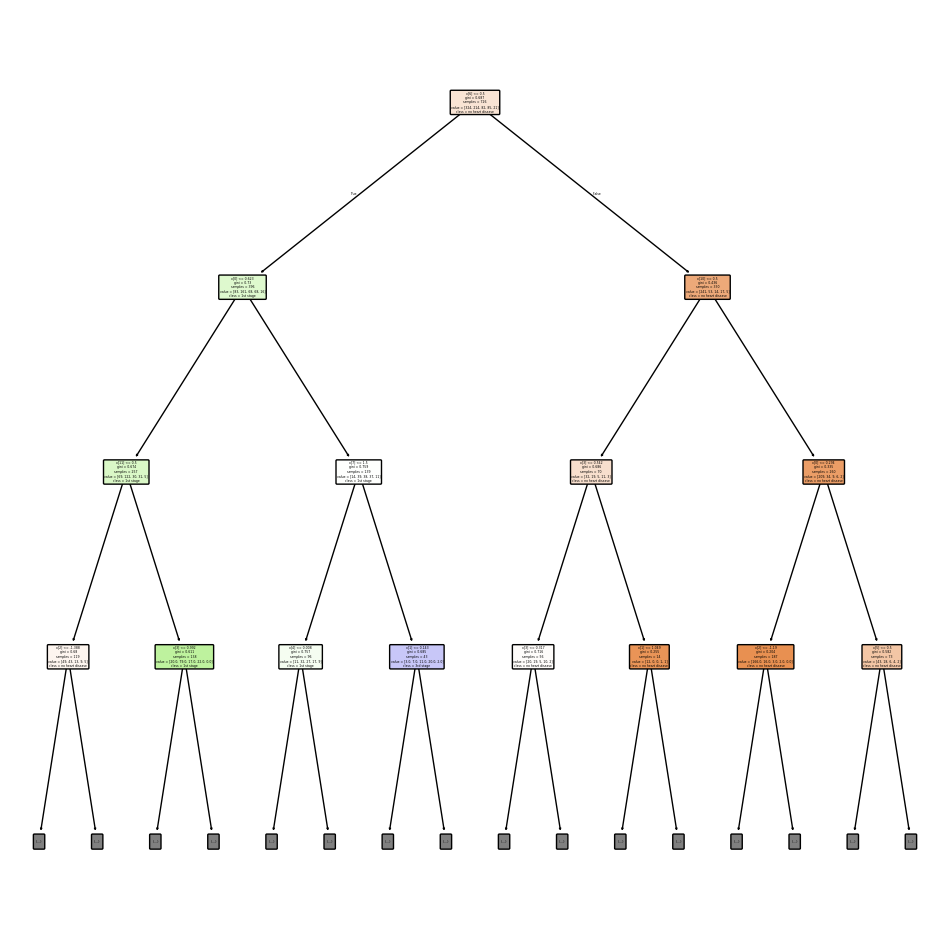

In [55]:
plt.figure(figsize=(12,12))
plot_tree(Dt,filled=True,max_depth=3,rounded=True,class_names=['no heart disease','1st stage','2nd stage','3rd stage']);

In [56]:
precision = precision_score(Y_train, Y_pred, average='weighted')  
recall = recall_score(Y_train, Y_pred, average='weighted')        
f1 = f1_score(Y_train, Y_pred, average='weighted')               

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Precision: 0.5833023005980901
Recall: 0.6170798898071626
F1-Score: 0.5829417234062518


In [57]:
# The above output tells about the Precision,Recall and F1-Score

## ROC_AUC is not working for the Multiclass.

# Interview Questions:

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

### 2.What is the difference between the Label encoding and One-hot encoding?